# Day 3: Data Cleaning & Missing Value Handling
Comprehensive data cleaning pipeline for heart disease dataset

## Import Required Libraries

In [2]:
import sys 
import os 
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scripts.data_cleaning import clean_dataset, detect_outliers

## Load Dataset

In [4]:
raw_path = "../data/raw/heart_disease_uci.csv"
df = pd.read_csv(raw_path)
print("Initial shape:", df.shape)
df.head()

Initial shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Missing Value Analysis

Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


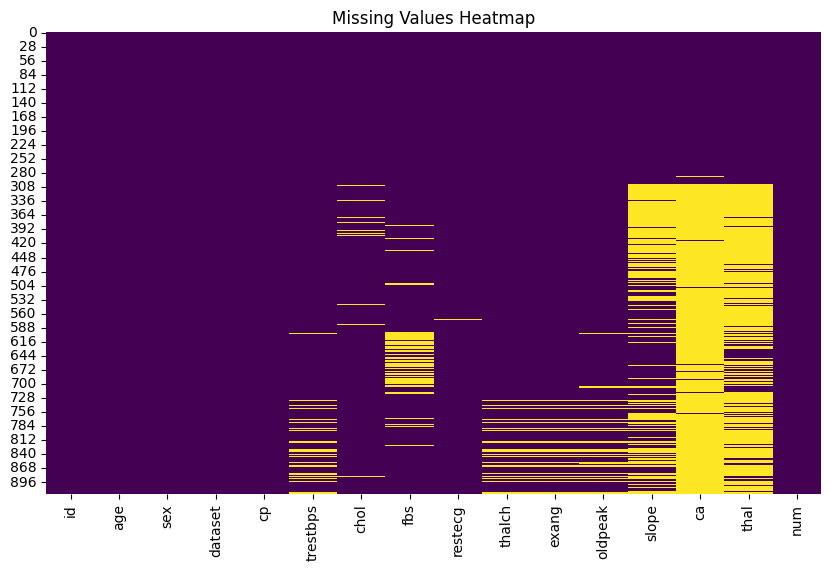

In [5]:
print("Missing values:\n", df.isnull().sum())

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.savefig("../visuals/missing_values_heatmap.png")
plt.show()

## Outlier Detection (Z-score & IQR)

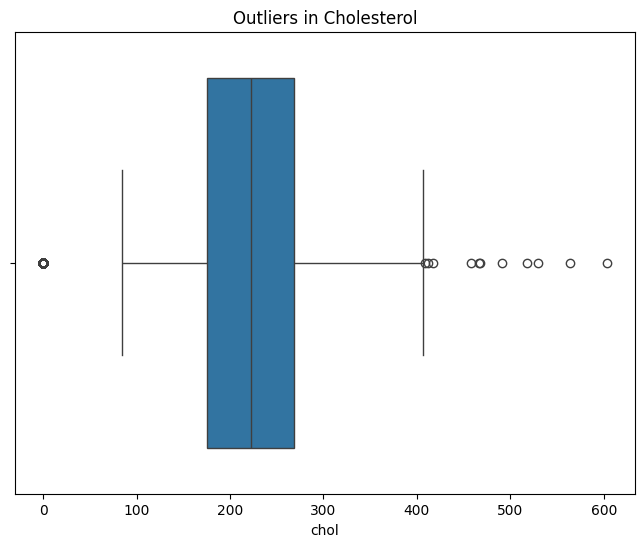

In [6]:
detect_outliers(df, "chol")  # Example feature

plt.figure(figsize=(8,6))
sns.boxplot(x=df["chol"])
plt.title("Outliers in Cholesterol")
plt.savefig("../visuals/boxplots/chol_outliers.png")
plt.show()

## Apply Cleaning Pipeline

In [7]:
cleaned_df = clean_dataset(df)
cleaned_df = cleaned_df.drop(columns=["dataset","id"])
print("Cleaned shape:", cleaned_df.shape)
print("Missing values after cleaning:\n", cleaned_df.isnull().sum())

Cleaned shape: (920, 14)
Missing values after cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


c:\Users\acer\Desktop\heart_disease_project\scripts\data_cleaning.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


## Save Intermediate and Processed Data

In [8]:
cleaned_df.to_csv("../data/interim/heart_disease_cleaned_partial.csv", index=False)
cleaned_df.to_csv("../data/processed/heart_disease_cleaned.csv", index=False)

## Before/After Comparison

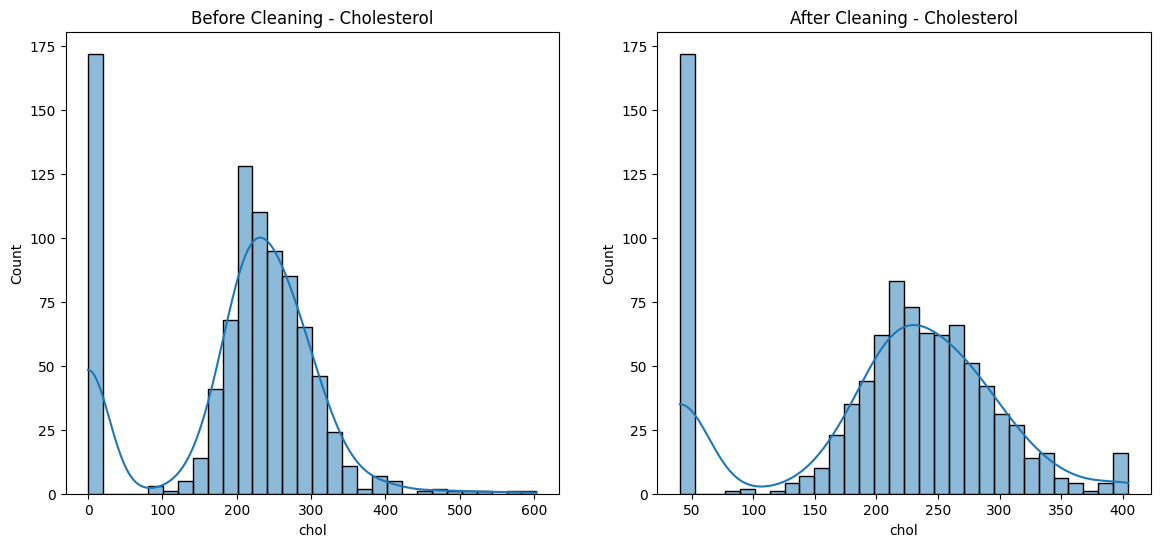

In [9]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.histplot(df["chol"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Before Cleaning - Cholesterol")

sns.histplot(cleaned_df["chol"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("After Cleaning - Cholesterol")

plt.savefig("../visuals/before_after_chol.png")
plt.show()